In [1]:
import sys
sys.path.append("../../../")

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('text.latex', preamble=r"\usepackage{amsmath} "+"\n"+r" \usepackage{bm}")
mpl.rcParams.update({'font.size': 12})

fig_scale = 1.8

In [2]:
from context_exploration.evaluation.optimize_action import average_entropy_plot_from_run

In [3]:
def plot_for_run(run_id_asq1, run_id_asq1_noisefree, run_id_asq2, run_id_asq2_noisefree, step):
    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(5.4*0.5*fig_scale, 2*fig_scale), dpi=80)
    average_entropy_plot_from_run(run_id_asq1_noisefree, step, ax[1, 0], label="$\epsilon=0$", rel=True)
    average_entropy_plot_from_run(run_id_asq2_noisefree, step, ax[1, 1], rel=True)
    average_entropy_plot_from_run(run_id_asq1, step, ax[1, 0], label="$\epsilon \sim \mathcal{N}(0, 0.01^2)$", rel=True)
    average_entropy_plot_from_run(run_id_asq2, step, ax[1, 1], rel=True)
    plt.subplots_adjust(wspace=1, hspace=0.5)
    
    actions = np.linspace(-2, 2, 100)
    squash_1 = np.clip(1-np.abs(actions), a_min=0, a_max=None)
    squash_2 = np.clip(np.abs(actions)-1, a_min=0, a_max=None)
    ax[0, 0].plot(actions, squash_1)
    ax[0, 0].set_ylabel("$\delta^{<1}(u_n) =$\n$ \max(1-|u_n|, 0)$")
    ax[0, 0].set_xlabel("Action $u$")
    ax[0, 1].plot(actions, squash_2)
    ax[0, 1].set_ylabel("$\delta^{>1}(u_n) =$\n$ \max(|u_n|-1, 0)$")
    ax[0, 1].set_xlabel("Action $u$")
    
    for row in range(2):
        ax[row, 0].axvspan(-1, 1, color='gray', alpha=0.2, lw=0)
        ax[row, 1].axvspan(-2, -1, color='gray', alpha=0.2, lw=0)
        ax[row, 1].axvspan(1, 2, color='gray', alpha=0.2, lw=0)
    
    ax[0, 0].set_title("$\delta^{<1}(u_n)$")
    ax[0, 1].set_title("$\delta^{>1}(u_n)$")
    #ax[1, 0].set_ylabel("Avg. entropy \n "+r"$\bm{\epsilon} \sim \mathcal{N}(0, \bm{I}\cdot(0.01)^2)$")
    #ax[1, 1].set_ylabel("Avg. entropy \n "+r"$\bm{\epsilon} \sim \mathcal{N}(0, \bm{I}\cdot(0.01)^2)$")
    #ax[1, 1].set_ylabel("Avg. entropy \n "+r"$\bm{\epsilon} \sim \mathcal{N}(0, \bm{I}\cdot(0.01)^2)$")
    #ax[2, 0].set_ylabel("Avg. entropy \n "+r"$\bm{\epsilon} = 0$")
    #ax[2, 1].set_ylabel("Avg. entropy \n "+r"$\bm{\epsilon} = 0$")
    #ax[1, 0].set_ylim(-4, 3)
    #ax[1, 1].set_ylim(-4, 3)
    #ax[2, 0].set_ylim(-4, 3)
    #ax[2, 1].set_ylim(-4, 3)
    ax[1, 0].legend(handlelength=0.2, bbox_to_anchor=(2.5, -0.5), ncol=2)

/home/jan/envs/etc_bugfix/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


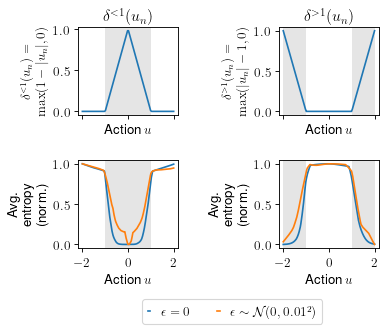

In [4]:
plot_for_run(
    "cr_s3_asq1_posweights_relu_npklw5", 
    "cr_s3_asq1_noisefree_posweights_relu_npklw5",
    "cr_s3_asq2_posweights_relu_npklw5",
    "cr_s3_asq2_noisefree_posweights_relu_npklw5",
    "50000_best")
# set CreationDate to 'None' for deterministic PDF output
plt.savefig("generated/toy_problem.pdf", bbox_inches='tight', dpi=80)

### Plot distribution of states for rollouts of toy system

In [5]:
from context_exploration.model.loader import get_run_directory, load_config, load_model
from context_exploration.data.envs import make_env
from context_exploration.evaluation.evaluate_calibration import generate_validation_rollouts

run_id = "cr_s3_asq1_posweights_relu_npklw5"
checkpoint_step = "50000_best"
device = "cuda"
env_name, _, _, _ = load_model(
    run_id, checkpoint_step, device
)
env = make_env(env_name)
observation_list = []
action_rng = np.random.RandomState(42)
rollout_length = 100
actions = action_rng.uniform(-2, 2, rollout_length)

for context_idx in range(50):
    env.initialize_context(42)
    #env.seed(42)
    obs = env.reset()

    observations = [obs]
    for action in actions:
        obs, _, _, _ = env.step([action])
        observations.append(obs)
    
    observations = np.stack(observations)
    observation_list.append(observations)
    env.release_context()
    
observations = np.stack(observation_list)

/home/jan/envs/etc_bugfix/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(50, 101, 2)


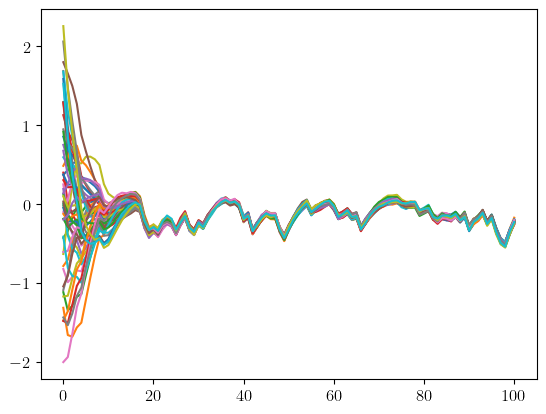

In [6]:
print(observations.shape)

import matplotlib.pyplot as plt
for idx in range(50):
    plt.plot(observations[idx, :, 0])